In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Communities & Crime Un-normalized dataset

Communities in the US. Data combines socio-economic data from the '90 Census, law enforcement data from the 1990 Law Enforcement Management and Admin Stats survey, and crime data from the 1995 FBI UCR

This dataset consists of 2215 instances of crimes that has been reported from across all the states in the United States of America

Total number of features  = 147

<br/>
5 - Non-predictive features

-- communityname: Community name - not predictive - for information only (string) 
<br/>
-- state: US state (by 2 letter postal abbreviation)(nominal) 
<br/>
-- countyCode: numeric code for county - not predictive, and many missing values (numeric) 
<br/>
-- communityCode: numeric code for community - not predictive and many missing values (numeric) 
<br/>
-- fold: fold number for non-random 10 fold cross validation, potentially useful for debugging, paired tests - not predictive (numeric - integer) 
<br/>

124 - Predictive features : More details on these can be found [here](https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized)
<br/>

18 potential goal features which are listed below

## Potential Goal features : To be predicted

-- murders: number of murders in 1995 (numeric - expected to be integer) potential GOAL attribute (to be predicted)
<br />
-- murdPerPop: number of murders per 100K population (numeric - decimal) potential GOAL attribute (to be predicted)
<br />
-- rapes: number of rapes in 1995 (numeric - expected to be integer) potential GOAL attribute (to be predicted) 
<br />
-- rapesPerPop: number of rapes per 100K population (numeric - decimal) potential GOAL attribute (to be predicted) 
<br />
-- robberies: number of robberies in 1995 (numeric - expected to be integer) potential GOAL attribute (to be predicted) 
<br />
-- robbbPerPop: number of robberies per 100K population (numeric - decimal) potential GOAL attribute (to be predicted) 
<br />
-- assaults: number of assaults in 1995 (numeric - expected to be integer) potential GOAL attribute (to be predicted) 
<br />
-- assaultPerPop: number of assaults per 100K population (numeric - decimal) potential GOAL attribute (to be predicted) 
<br />
-- burglaries: number of burglaries in 1995 (numeric - expected to be integer) potential GOAL attribute (to be predicted) 
<br />
-- burglPerPop: number of burglaries per 100K population (numeric - decimal) potential GOAL attribute (to be predicted) 
<br />
-- larcenies: number of larcenies in 1995 (numeric - expected to be integer) potential GOAL attribute (to be predicted) 
<br />
-- larcPerPop: number of larcenies per 100K population (numeric - decimal) potential GOAL attribute (to be predicted) 
<br />
-- autoTheft: number of auto thefts in 1995 (numeric - expected to be integer) potential GOAL attribute (to be predicted) 
<br />
-- autoTheftPerPop: number of auto thefts per 100K population (numeric - decimal) potential GOAL attribute (to be predicted) 
<br />
-- arsons: number of arsons in 1995 (numeric - expected to be integer) potential GOAL attribute (to be predicted) 
<br />
-- arsonsPerPop: number of arsons per 100K population (numeric - decimal) potential GOAL attribute (to be predicted) 
<br />
-- ViolentCrimesPerPop: total number of violent crimes per 100K popuation (numeric - decimal) GOAL attribute (to be predicted) 
<br />
-- nonViolPerPop: total number of non-violent crimes per 100K popuation (numeric - decimal) potential GOAL attribute (to be predicted) 
<br />

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

from scipy import stats, optimize
from sklearn.preprocessing import Imputer
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.pipeline import Pipeline

from sklearn.base import clone
from itertools import combinations
from sklearn.metrics import explained_variance_score, r2_score, median_absolute_error

print('The scikit-learn version is {}.'.format(sklearn.__version__))
print('The pandas version is {}.'.format(pd.__version__))
print('The numpy version is {}.'.format(np.__version__))

The scikit-learn version is 0.18.1.
The pandas version is 0.19.2.
The numpy version is 1.12.0.


/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
goal_features = ['murders', 'murdPerPop', 'rapes', 'rapesPerPop', 'robberies','robbbPerPop',
                 'assaults', 'assaultPerPop', 'burglaries', 'burglPerPop', 'larcenies', 'larcPerPop',
                 'autoTheft', 'autoTheftPerPop', 'arsons', 'arsonsPerPop', 'violentPerPop', 'nonViolPerPop']

non_predictive_features = ['communityname', 'state', 'countyCode', 'communityCode', 'fold']

In [43]:
df = pd.read_csv('../datasets/UnnormalizedCrimeData.csv');
df = df.replace('?',np.NAN)
features = [x for x in df.columns if x not in goal_features and x not in non_predictive_features]
len(features)

124

In [48]:
df[goal_features].isnull().sum()

murders            0
murdPerPop         0
rapes              0
rapesPerPop        0
robberies          0
robbbPerPop        0
assaults           0
assaultPerPop      0
burglaries         0
burglPerPop        0
larcenies          0
larcPerPop         0
autoTheft          0
autoTheftPerPop    0
arsons             0
arsonsPerPop       0
violentPerPop      0
nonViolPerPop      0
dtype: int64

In [45]:
for x in features:
    df[[x]] = df[[x]].apply(pd.to_numeric)
    df[[x]]  = df[[x]].replace(np.nan, df[x].mean())

In [47]:
for x in goal_features:
    df[[x]] = df[[x]].apply(pd.to_numeric)
    df[[x]]  = df[[x]].replace(np.nan, df[x].mean())

# Correlation :

To fit a linear regression model, we are interested in features which have high correlation with our target variable. We use `np.corrcoef()` to calculate the correlation coefficients. It is difficult to visualize all the features at once, but we group them and plot the matrix. 

As shown below, our target variable `murders` has a very high correlation(0.96) with the feature `pop` which means population for community

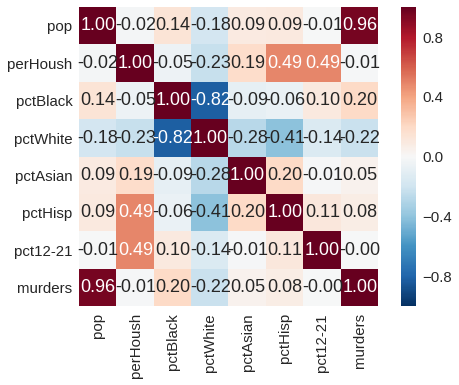

In [52]:
import seaborn as sns

#for x in range(0, len(features)-5, 5):
start_index = 0;
end_index = 7;
temp_cols = features[start_index:end_index] # Select a subset of features
temp_cols.append('murders') # Choose our target variable
cm = np.corrcoef(df[temp_cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                yticklabels=temp_cols,
                xticklabels=temp_cols)

# murdPerPop : number of murders per 100K population 

`murdPerPop` is positively correlated(0.65) with the feature `pctBlack`
<br />
`murdPerPop` is negatively correlated(-0.67) with the feature `pctWhite`

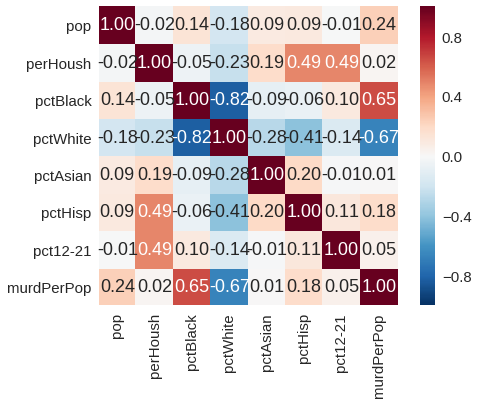

In [51]:
start_index = 0;
end_index = 7;
temp_cols = features[start_index:end_index] # Select a subset of features
temp_cols.append('murdPerPop') # Choose our target variable
cm = np.corrcoef(df[temp_cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                yticklabels=temp_cols,
                xticklabels=temp_cols)

# rapesPerPop : number of rapes per 100K population 

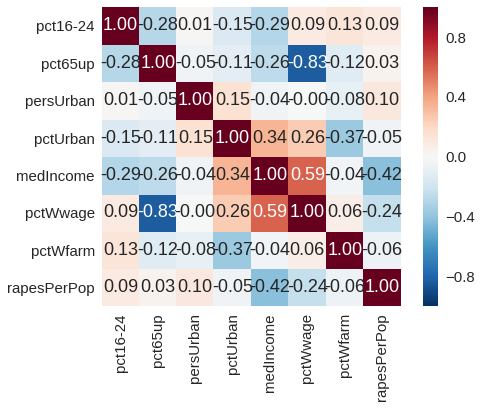

In [49]:
start_index = 8;
end_index = 15;
temp_cols = features[start_index:end_index] # Select a subset of features
temp_cols.append('rapesPerPop') # Choose our target variable
cm = np.corrcoef(df[temp_cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                yticklabels=temp_cols,
                xticklabels=temp_cols)